# Chapter6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Pipeline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [5]:
le.transform(['M', 'B'])

array([1, 0])

In [6]:
#データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [8]:
#make_pipeline関数の使用
#StandardScaler, PCAをscikit-learnの変換器として、LogisticRegressionをscikit-learnの推定器として受け取る

#データの標準化、次元削減
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))
#学習の実行
pipe_lr.fit(X_train, y_train) 

y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


## k-hold cross-validation

In [9]:
from sklearn.model_selection import StratifiedKFold

In [10]:
#層化k分割交差検証(stratified k-hold cross-validation)

#分割元データ、分割数を指定
khold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(khold):
    pipe_lr.fit(X_train[train], y_train[train]) #データをモデルに適合
    score = pipe_lr.score(X_train[test], y_train[test]) #テストデータの正解率を算出
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

# 正解率の平均と標準誤差を表示
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
#cross_val_score関数を使っても正解率を出せる
#n_jobsは使用するCPUの数を指定
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]

CV accuracy: 0.950 +/- 0.014


## Learning Curve and Validation Curve

In [13]:
from sklearn.model_selection import learning_curve

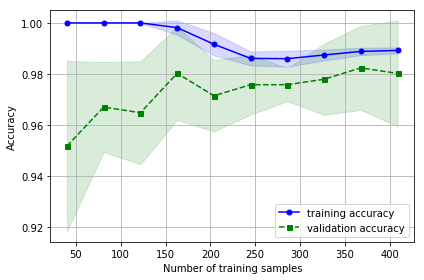

In [14]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))
#交差検証による正解率を算出
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim =(0.8, 1.0)
plt.tight_layout()
plt.show()
#トレーニングデータのサンプル数が十分大きいとバイアスとバリアンスのバランスがちょうど良い
#トレーニングデータのサンプル数が小さいと過学習の傾向

In [15]:
from sklearn.model_selection import validation_curve

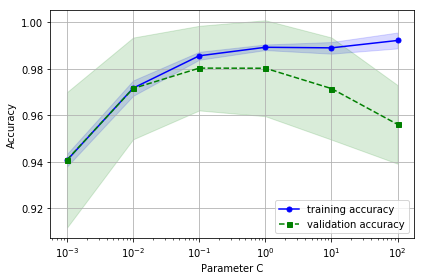

In [16]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train,
                                           param_name='logisticregression__C', param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim =(0.8, 1.0)
plt.tight_layout()
plt.show()
#Cを大きくして正則化の強さを上げると、わずかながら過学習の傾向が見られる

## Tuning with grid search

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [18]:
#グリッドサーチはしらみつぶしの網羅的探索
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
#チューニングしたいパラメータ：線形SVM（svc_C）とRBFカーネルSVM（svc_C, svc_gamma）
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
                          {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
#モデルの最良スコアを出力
print(gs.best_score_)
#最良スコアとなるパラメータ値を出力
print(gs.best_params_)

0.9846153846153847
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [19]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974


## Nested cross-validation

In [20]:
#k分割交差検証を使用してトレーニングセットとテストセットに分ける（ここではk=5）
#トレーニングセットをk分割交差検証を使用（ここではk=2）
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.974 +/- 0.015


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
#決定木のチューニング
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                                 param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}],
                                 scoring='accuracy',
                                 cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.934 +/- 0.016


## Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


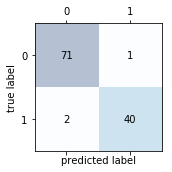

In [25]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
#ヒートマップの作成
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

In [27]:
#適合率（陽性と予測されたうち実際に陽性と判断された割合）
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
#再現率（実際に陽性のとききちんと陽性と予測される確率）
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
#F1スコア（適合率と再現率の調和平均）
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


## ROC

In [28]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

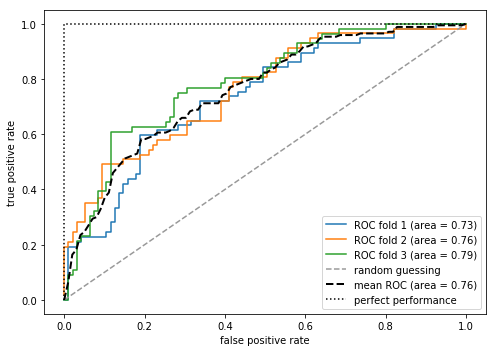

In [29]:
#よくわからん？？？

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(penalty='l2', random_state=1, C=100.0))
X_train2 = X_train[:, [4,14]]
cv = list(StratifiedKFold(n_splits=3, random_state=1).split(X_train, y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
plt.plot([0,1], [0,1], linestyle='--', color=(0.6,0.6,0.6), label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0,0,1], [0,1,1], linestyle=':', color='black', label='perfect performance')
plt.xlim=(-0.05, 1.05)
plt.ylim=(-0.05, 1.05)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Imbalance

In [31]:
#良性腫瘍のデータ全てと悪性腫瘍のデータ40個からなるデータを作る（クラスの不均衡）
X_imb = np.vstack((X[y==0], X[y==1][:40]))
y_imb = np.hstack((y[y==0], y[y==1][:40]))
y_pred = np.zeros(y_imb.shape[0])
#何もしなくても90%くらいの正解率になる
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [32]:
from sklearn.utils import resample

In [33]:
print('Number of class 1 samples before: ', X_imb[y_imb == 1].shape[0])

Number of class 1 samples before:  40


In [34]:
#サンプルの個数がクラス０と同じになるまで新しいサンプルを復元抽出
X_upsampled, y_upsampled = resample(X_imb[y_imb==1], y_imb[y_imb==1],
                                                                    replace=True, n_samples=X_imb[y_imb==0].shape[0], random_state=123)
print('Number of class 1 samples after: ', X_upsampled.shape[0])

Number of class 1 samples after:  357


In [36]:
#クラスの不均衡が解消されている
X_bal = np.vstack((X[y==0], X_upsampled))
y_bal = np.hstack((y[y==0], y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred==y_bal)*100

50.0